In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    name= "cats_vs_dogs",
    as_supervised=True,
    with_info=True,
    split=["train[:80%]","train[80%:90%]", "train[90%:]"])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.1.incompleteGJHWDT/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
get_label = metadata.features["label"].int2str

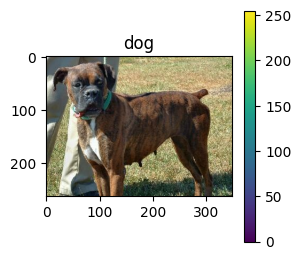

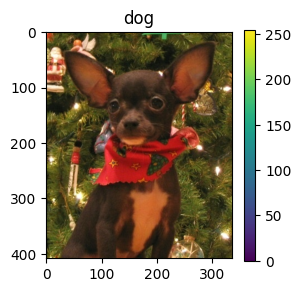

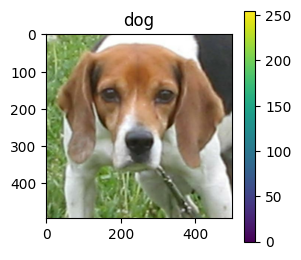

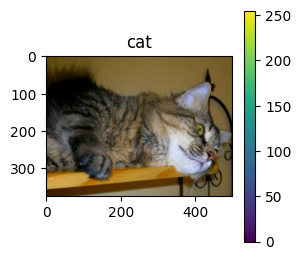

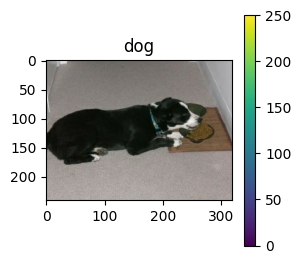

In [ ]:
for img, label in raw_train.take(5):
  plt.figure(figsize = (3,3))
  plt.imshow(img)
  plt.colorbar()
  plt.title(get_label(label))
  plt.plot()

In [ ]:
size = 160
def format_image(image, label):
  image = tf.cast(image, tf.float32)
  image = image / 127.5
  image = tf.image.resize(image, (size, size))
  return image, label

In [ ]:
train = raw_train.map(format_image)
validation = raw_validation.map(format_image)
test = raw_test.map(format_image)

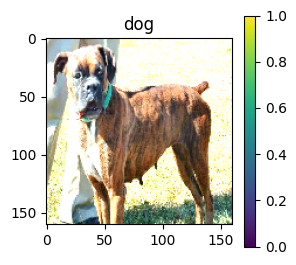

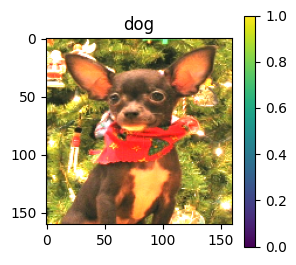

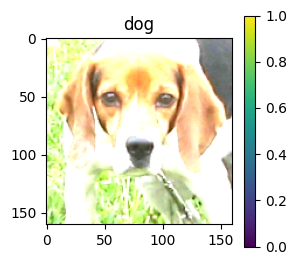

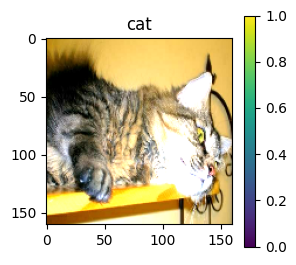

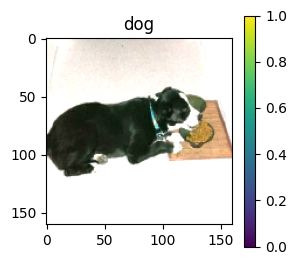

In [ ]:
for img, label in train.take(5):
  plt.figure(figsize = (3,3))
  plt.imshow(img)
  plt.colorbar()
  plt.title(get_label(label))
  plt.plot()

In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
for img, label in raw_train.take(1):
  print(img.shape)

for img, label in train.take(1):
  print(img.shape)

(262, 350, 3)
(160, 160, 3)


In [ ]:
model = tf.keras.applications.MobileNetV2(input_shape = (size,size,3), include_top = False)
model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [ ]:
model.trainable = False
model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 80, 80, 32)           864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 80, 80, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 80, 80, 32)           0         ['bn_Conv1[

In [ ]:
model = tf.keras.Sequential([
    model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss= tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
model.evaluate(validation_batches,verbose=1, steps=20)

20/20 [==============================] - 7s 293ms/step - loss: 6.1365 - accuracy: 0.4891


[6.136501789093018, 0.48906248807907104]

In [ ]:
model.fit(train_batches, epochs=10, verbose=1, validation_data=validation_batches)

Epoch 1/10
582/582 [==============================] - 226s 381ms/step - loss: 1.5197 - accuracy: 0.8145 - val_loss: 0.5198 - val_accuracy: 0.9308
Epoch 2/10
582/582 [==============================] - 219s 376ms/step - loss: 0.4732 - accuracy: 0.9416 - val_loss: 0.3294 - val_accuracy: 0.9561
Epoch 3/10
582/582 [==============================] - 228s 390ms/step - loss: 0.3770 - accuracy: 0.9568 - val_loss: 0.2488 - val_accuracy: 0.9617
Epoch 4/10
582/582 [==============================] - 222s 379ms/step - loss: 0.3298 - accuracy: 0.9628 - val_loss: 0.2378 - val_accuracy: 0.9665
Epoch 5/10
582/582 [==============================] - 225s 386ms/step - loss: 0.3026 - accuracy: 0.9665 - val_loss: 0.1990 - val_accuracy: 0.9682
Epoch 6/10
582/582 [==============================] - 222s 380ms/step - loss: 0.2806 - accuracy: 0.9693 - val_loss: 0.2379 - val_accuracy: 0.9721
Epoch 7/10
582/582 [==============================] - 202s 345ms/step - loss: 0.2691 - accuracy: 0.9714 - val_loss: 0.2095 -

In [ ]:
model.evaluate(test_batches)

73/73 [==============================] - 23s 312ms/step - loss: 0.2618 - accuracy: 0.9725


[0.26176366209983826, 0.9724849462509155]